In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pickle
import gzip

import sys
sys.path.append('/mnt/disk1/yunseob/Pytorch/SSM/0_modules')
from SSM_utils import DataConfig, GBdataLoad, B6dataLoad

# 1. Save Data

In [4]:
DataConfig('/mnt/disk1/yunseob/Pytorch/SSM/1_Semblex/06_10p_overlap/SemblexData/wt_4040')

# 2. Load Data

In [3]:
def LoadDataConfig(data_dir):
    with gzip.open(data_dir + '/SemblexData_config.pickle', 'rb') as f:
        data = pickle.load(f)
        
    for cls, data_bunch in data.items():
        for data_i in data_bunch:
            print("{} - {:02d} - {}".format(cls, data_i['0_index'], data_i['1_file']))
            print("Shape of data = total: {}, training: {}, testing: {}\n".format(data_i['2_data'].shape, 
                                                                                        data_i['3_train_data'].shape, 
                                                                                        data_i['4_test_data'].shape))

In [5]:
LoadDataConfig('/mnt/disk1/yunseob/Pytorch/SSM/1_Semblex/06_10p_overlap/SemblexData/wt_4040')

BAD - 01 - SEMBLEX_200211__BAD_CONDITIONS__HEAVY_OIL__WT_1s_1650hz__258_40_40.npy
Shape of data = total: (258, 40, 40, 2), training: (206, 40, 40, 2), testing: (52, 40, 40, 2)

BAD - 02 - SEMBLEX_200211__BAD_TOOLS__CHIPPED_PUNCH__WT_1s_1650hz__138_40_40.npy
Shape of data = total: (138, 40, 40, 2), training: (110, 40, 40, 2), testing: (28, 40, 40, 2)

BAD - 03 - SEMBLEX_200212__BAD_MATERIAL__SCRAPPED__WT_1s_1650hz__213_40_40.npy
Shape of data = total: (213, 40, 40, 2), training: (170, 40, 40, 2), testing: (43, 40, 40, 2)

BAD - 04 - SEMBLEX_200212__BAD_MATERIAL__SCRAPPED__WT_1s_1650hz__244_40_40.npy
Shape of data = total: (244, 40, 40, 2), training: (195, 40, 40, 2), testing: (49, 40, 40, 2)

BAD - 05 - SEMBLEX_200212__BROKEN_TOOLS__BAD_DIE_CHIP_TOP_2__WT_1s_1650hz__783_40_40.npy
Shape of data = total: (783, 40, 40, 2), training: (626, 40, 40, 2), testing: (157, 40, 40, 2)

BAD - 06 - SEMBLEX_200212__BROKEN_TOOLS__BAD_DIE_CHIP_TOP_3__WT_1s_1650hz__68_40_40.npy
Shape of data = total: (68

# 3. Data plot

In [7]:
def PlotWTs(test_X, test_Y, class_name, cls_num = 0):

    idx = np.random.choice(np.where(test_Y == cls_num)[0])

    plt.figure(figsize = (10, 5))
    plt.suptitle('idx: {} / label: {}'.format(idx, class_name[int(test_Y[idx])]), y = 0.94)
    plt.subplot(121)
    plt.title('Sensor A (Die side)')
    plt.imshow(test_X[idx, 0, :, :])
    plt.axis('off')
    plt.subplot(122)
    plt.title('Sensor B (Material side)')
    plt.imshow(test_X[idx, 1, :, :])
    plt.axis('off')
    plt.show()

In [8]:
data_dir = '/mnt/disk1/yunseob/Pytorch/SSM/1_Semblex/06_10p_overlap/SemblexData/wt_4040'

GB_test_X, GB_test_Y = GBdataLoad(data_dir, data_type = '4_test_data')
B6_test_X, B6_test_Y = B6dataLoad(data_dir, data_type = '4_test_data')

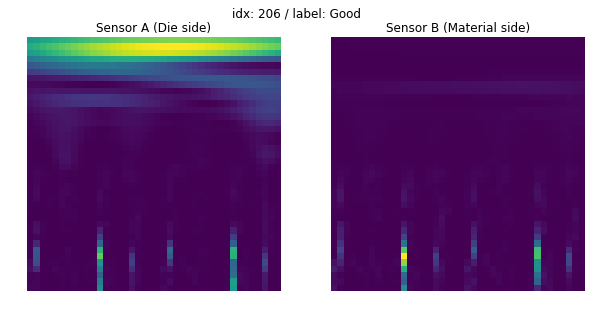

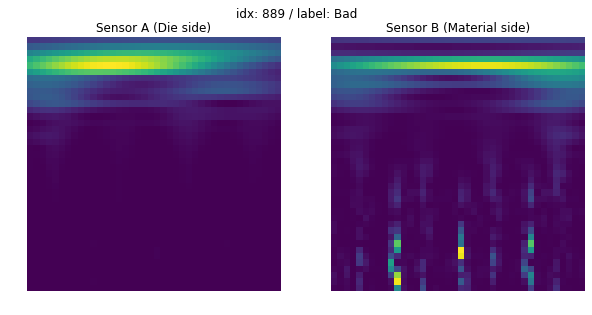

In [9]:
class_name = ['Good', 'Bad']

for i in range(len(class_name)):
    PlotWTs(GB_test_X, GB_test_Y, class_name, cls_num = i)

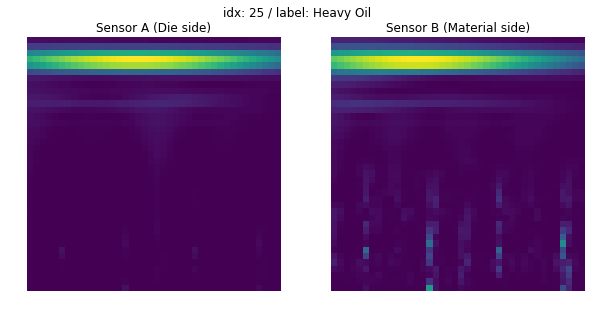

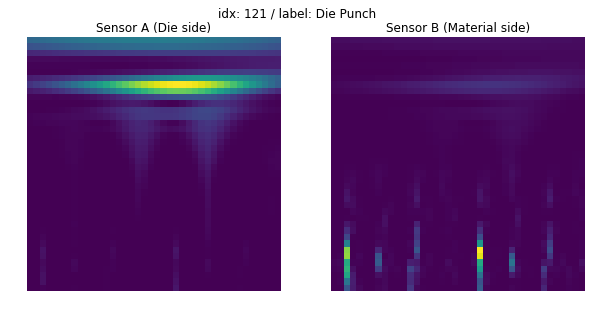

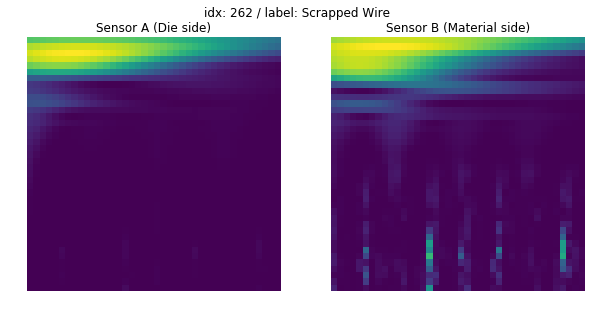

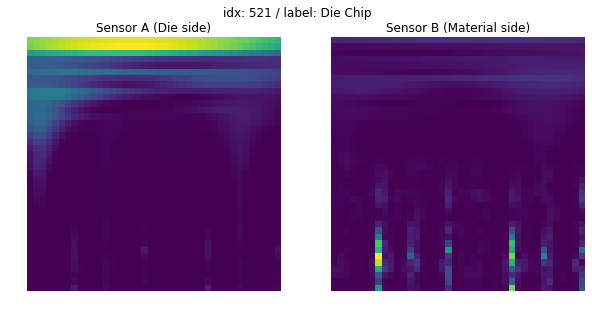

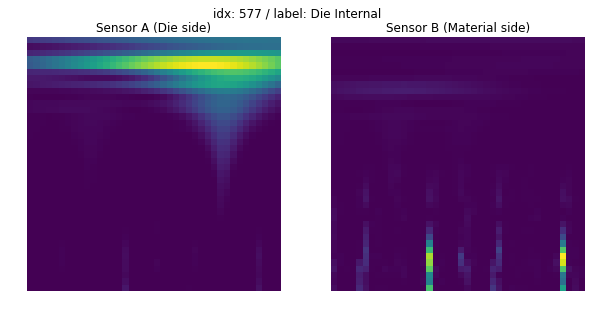

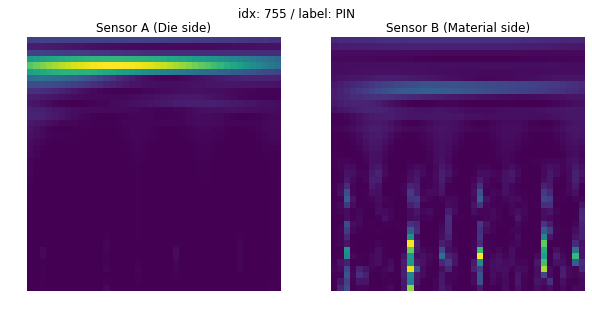

In [10]:
class_name = ['Heavy Oil', 'Die Punch', 'Scrapped Wire', 'Die Chip', 'Die Internal', 'PIN']

for i in range(len(class_name)):
    PlotWTs(B6_test_X, B6_test_Y, class_name, cls_num = i)